In [134]:
library(dplyr)
library(ggplot2)
library(tidyr)
df <- read.csv("../../dane.csv")

In [12]:
df

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True
0006_01,Earth,False,F/2/S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28,False,0,0,0,0,NA,Candra Jacostaffey,True
0007_01,Earth,False,F/3/S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True
0008_01,Europa,True,B/1/P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True


## Data description

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you want to predict if you decide to create a machine learning

__First Ideas :__

 - Age related dependencies
     - Number of passangers
     - Who uses CryoSleep the most?
     - Are some age groups more prone to buying VIP services during their flight?
     - How much does each age group spend on average?
     - Demography of each home planet
 
 - Amenities:
     - Total spending on each of the luxury amenities
     - Are there some groups that spent much more on luxury amenities than the rest?
     - Does home planet affect the tendencies to spend more on some facilities than the others?
 
 - Relationship between cabin and the destination

## Age related dependencies

1. Number of passengers

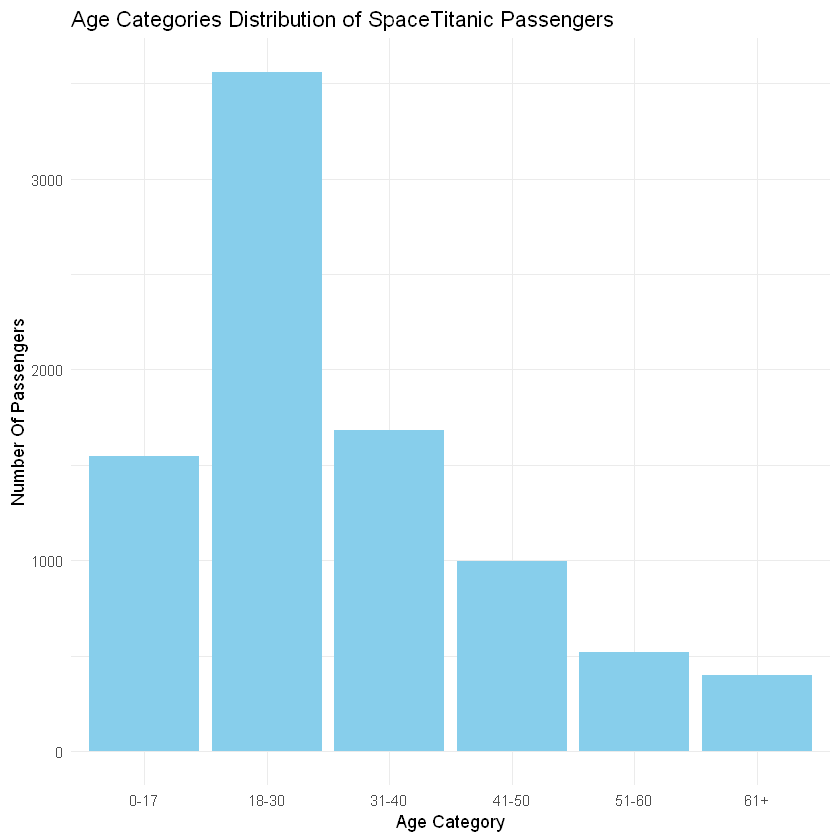

In [16]:
df %>%
  mutate(AgeCategory = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  group_by(AgeCategory) %>%
  summarize(Count = n()) %>% 
  ggplot(aes(x = AgeCategory, y = Count)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Age Categories Distribution of SpaceTitanic Passengers",
       x = "Age Category",
       y = "Number Of Passengers") +
  theme_minimal()

__Observation:__ We can see that most of the passengers are in the ages 18-30. From that point the number is steadly decreasing

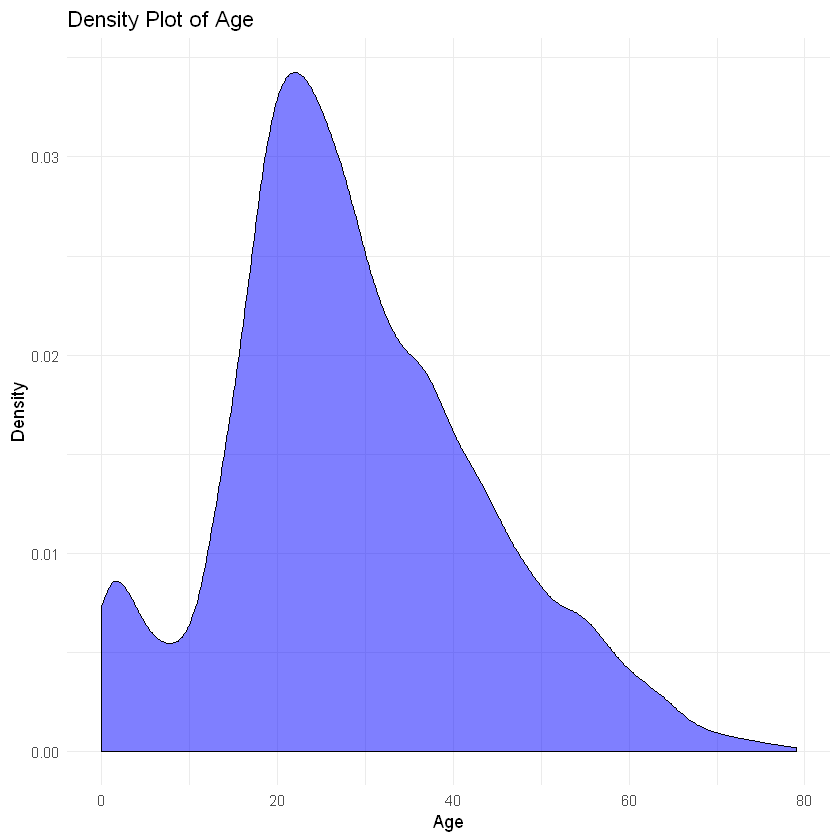

In [137]:
df %>%
  filter(Age >= 0) %>% 
  ggplot(aes(x = Age)) +
  geom_density(fill = "blue", alpha = 0.5) +  # Customize the fill and transparency
  labs(title = "Density Plot of Age", x = "Age", y = "Density") +  # Add a title and axis labels
  theme_minimal()

---
2) Who uses CryoSleep the most?

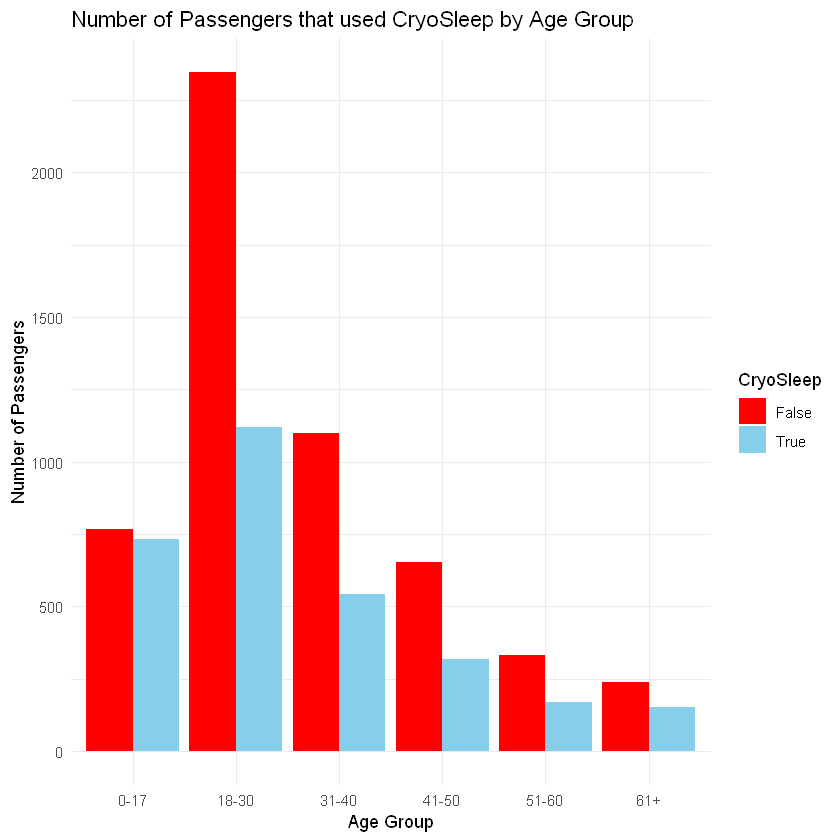

In [22]:
df %>%
  mutate(AgeGroup = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  filter(CryoSleep != '') %>% 
  group_by(AgeGroup, CryoSleep) %>%
  summarize(Count = n()) %>% 
  ggplot(aes(x = AgeGroup, y = Count, fill = CryoSleep)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Number of Passengers that used CryoSleep by Age Group",
       x = "Age Group",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_fill_manual(values = c("True" = "skyblue", "False" = "red"))

__Observation:__ Knowing the total number of passengers, this plot is not that informative. It is not clear enough to see what part of the age group decides to use CryoSleep. A better alternative should be a plot showing the percentage of passengers that used CryoSleep in each age group 

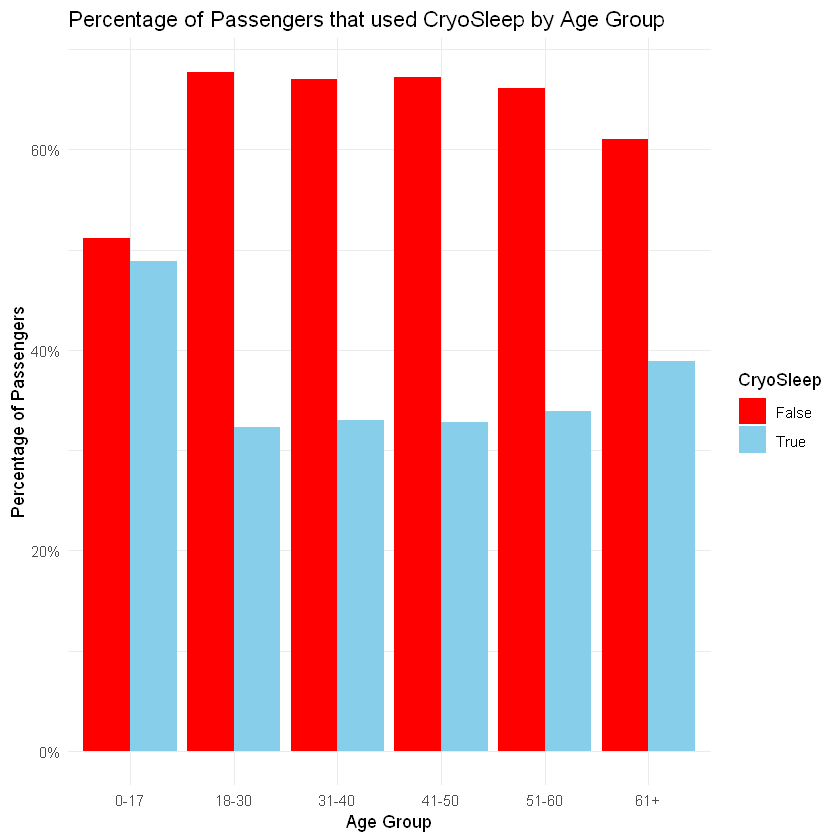

In [25]:
df_1 <- df %>%
  mutate(AgeGroup = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  filter(CryoSleep != '') %>% 
  group_by(AgeGroup, CryoSleep) %>%
  summarize(Count = n())

df_1 <- df_1 %>%
  group_by(AgeGroup) %>%
  mutate(Percent = (Count / sum(Count)) * 100)

ggplot(df_1, aes(x = AgeGroup, y = Percent, fill = CryoSleep)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Percentage of Passengers that used CryoSleep by Age Group",
       x = "Age Group",
       y = "Percentage of Passengers") +
  theme_minimal() +
  scale_fill_manual(values = c("True" = "skyblue", "False" = "red")) +
  scale_y_continuous(labels = scales::percent_format(scale = 1))

__Observation:__ With this plot we can see that almost half of minors used CryoSleep on there voyage through space. Intrestingly, apart from the underage passengers, the proportion of CryoSleep slightly rises with the next generations.  

---
3) Are some age groups more prone to buying VIP services during their flight

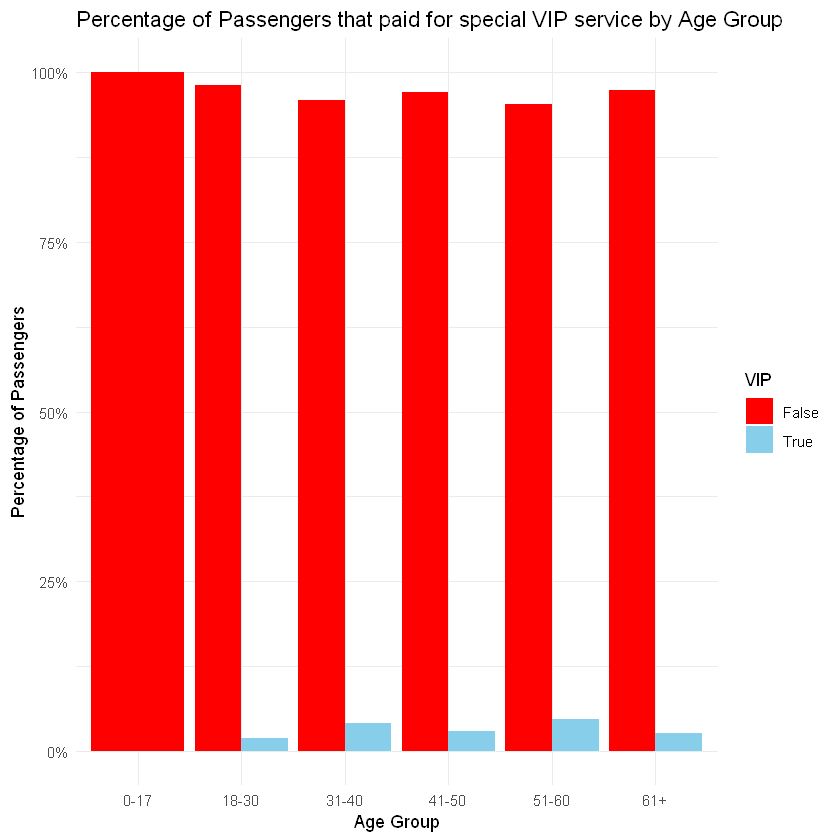

In [53]:
df_1 <- df %>%
  mutate(AgeGroup = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  filter(VIP != '') %>% 
  group_by(AgeGroup, VIP) %>%
  summarize(Count = n())

df_1 %>%
  group_by(AgeGroup) %>%
  mutate(Percent = (Count / sum(Count)) * 100) %>% 
  ggplot(aes(x = AgeGroup, y = Percent, fill = VIP)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Percentage of Passengers that paid for special VIP service by Age Group",
       x = "Age Group",
       y = "Percentage of Passengers") +
  theme_minimal() +
  scale_fill_manual(values = c("True" = "skyblue", "False" = "red")) +
  scale_y_continuous(labels = scales::percent_format(scale = 1, accuracy = 1))

__Observation:__ None of the underage passengers paid for the special VIP service. In other age groups the proportion of those that did pay for is low but it is the highest for ages 51-60.

---
4) How much does each age group spend on average? 

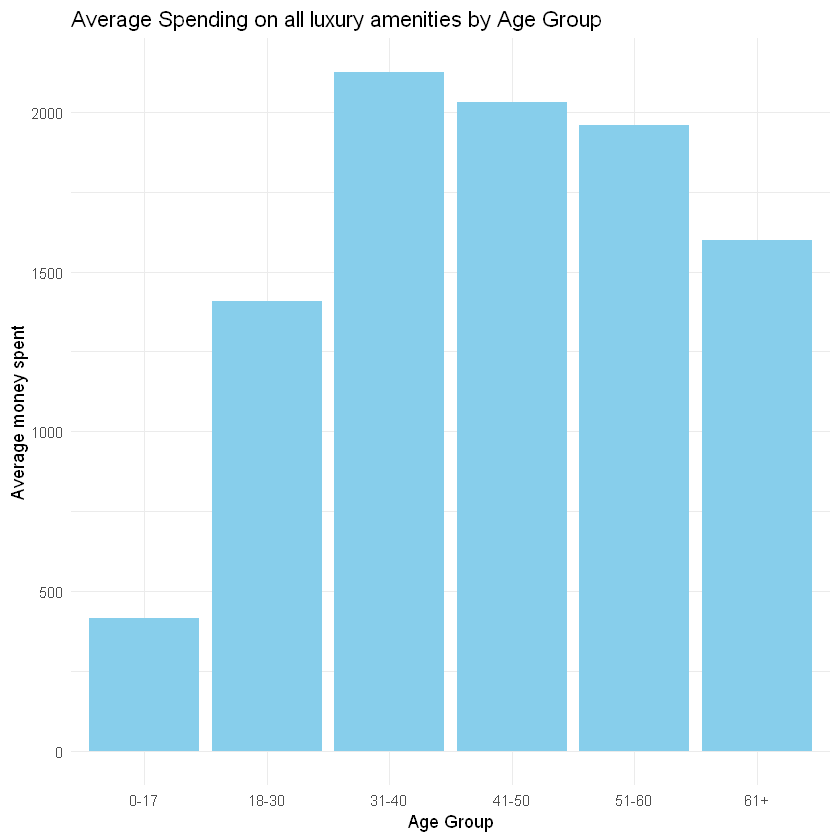

In [56]:
df %>%
  mutate(SumOfCosts = RoomService + FoodCourt + ShoppingMall + Spa + VRDeck) %>%
  mutate(AgeGroup = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  group_by(AgeGroup) %>%
  summarise(MeanSpending = mean(SumOfCosts, na.rm = T)) %>%
  ggplot(aes(x = AgeGroup, y = MeanSpending)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Spending on all luxury amenities by Age Group",
       x = "Age Group",
       y = "Average money spent") +
  theme_minimal()

__Observation:__ On average the age group that spends the most on luxury ammenities is 31-40

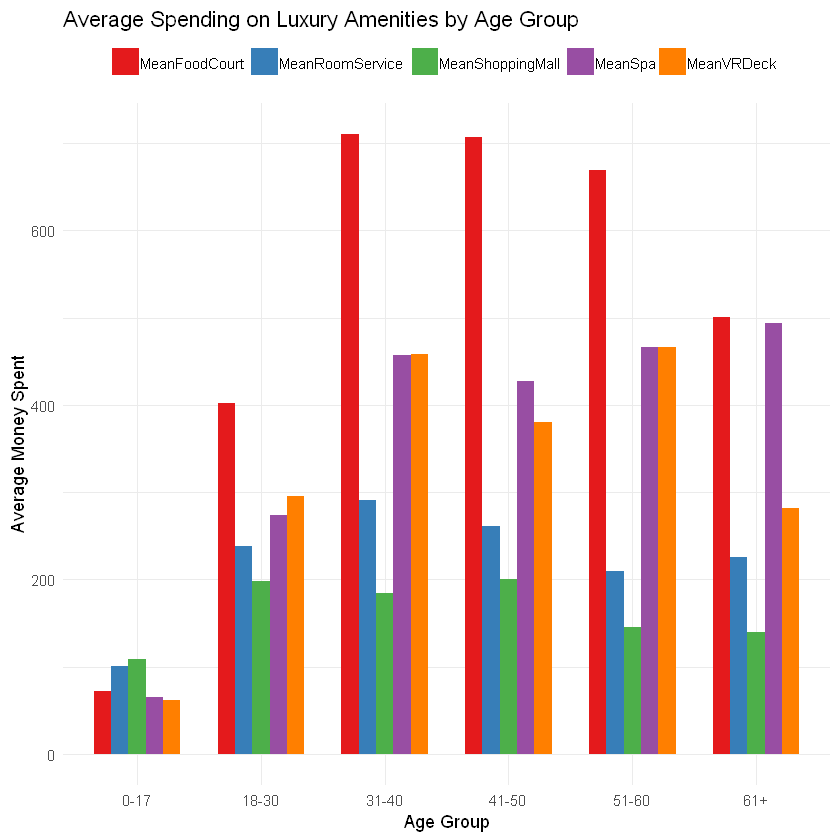

In [73]:
df %>%
  mutate(AgeGroup = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  group_by(AgeGroup) %>%
  summarize(
    MeanRoomService = mean(RoomService, na.rm = TRUE),
    MeanFoodCourt = mean(FoodCourt, na.rm = TRUE),
    MeanShoppingMall = mean(ShoppingMall, na.rm = TRUE),
    MeanSpa = mean(Spa, na.rm = TRUE),
    MeanVRDeck = mean(VRDeck, na.rm = TRUE)
  ) %>% 
  gather(key = "Facility", value = "MeanSpending", -AgeGroup) %>% 
  ggplot(aes(x = AgeGroup, y = MeanSpending, fill = Facility)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(title = "Average Spending on Luxury Amenities by Age Group",
       x = "Age Group",
       y = "Average Money Spent") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position = "top", legend.title = element_blank())


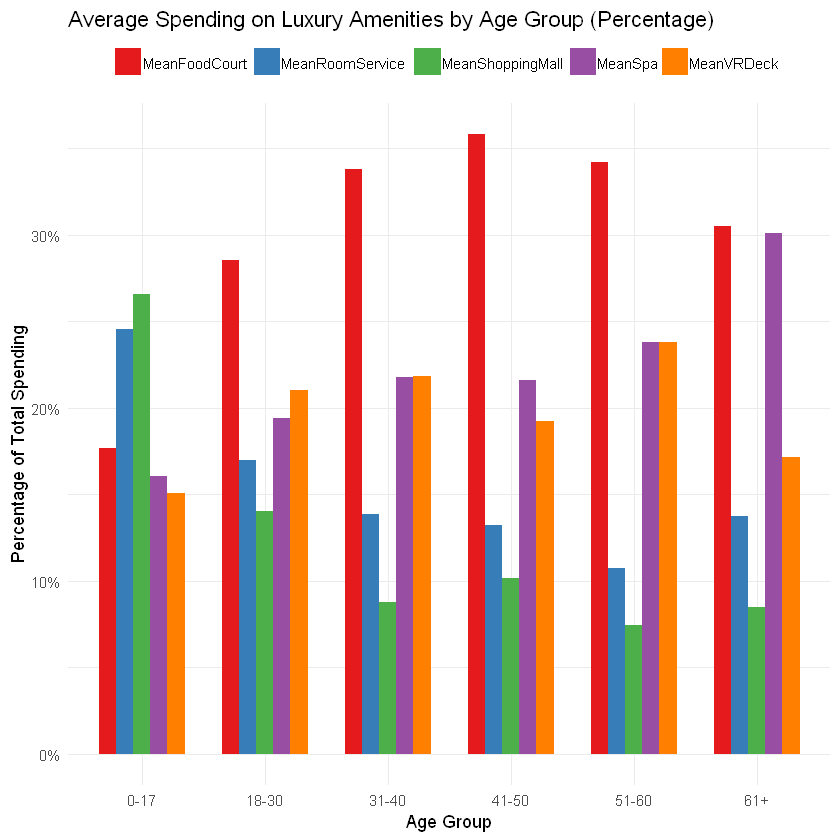

In [74]:
df %>%
  mutate(AgeGroup = case_when(
    Age <= 17 ~ "0-17",
    Age <= 30 ~ "18-30",
    Age <= 40 ~ "31-40",
    Age <= 50 ~ "41-50",
    Age <= 60 ~ "51-60",
    TRUE ~ "61+"
  )) %>%
  group_by(AgeGroup) %>%
  summarize(
    MeanRoomService = mean(RoomService, na.rm = TRUE),
    MeanFoodCourt = mean(FoodCourt, na.rm = TRUE),
    MeanShoppingMall = mean(ShoppingMall, na.rm = TRUE),
    MeanSpa = mean(Spa, na.rm = TRUE),
    MeanVRDeck = mean(VRDeck, na.rm = TRUE)
  ) %>% 
  gather(key = "Facility", value = "MeanSpending", -AgeGroup) %>%
  group_by(AgeGroup) %>%
  mutate(Percent = (MeanSpending / sum(MeanSpending)) * 100) %>% 
  ggplot(aes(x = AgeGroup, y = Percent, fill = Facility)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(title = "Average Spending on Luxury Amenities by Age Group (Percentage)",
       x = "Age Group",
       y = "Percentage of Total Spending") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position = "top", legend.title = element_blank()) +
  scale_y_continuous(labels = scales::percent_format(scale = 1))

__Observation:__ On average the intrest in Spa services rises with age. Room Services and Shopping Mall are the most popular among the younger passengers and their intrest steadly decreases with age in both cases. 

In [72]:
df %>% 
  filter(HomePlanet != '') %>% 
  group_by(HomePlanet) %>% 
  summarise(count = n()) %>% 
  arrange(-count)


HomePlanet,count
Earth,4602
Europa,2131
Mars,1759


This means that there are only 3 home planets. The most popular of them all is Earth. 

## Amenities

In [ ]:
options(scipen = 999)

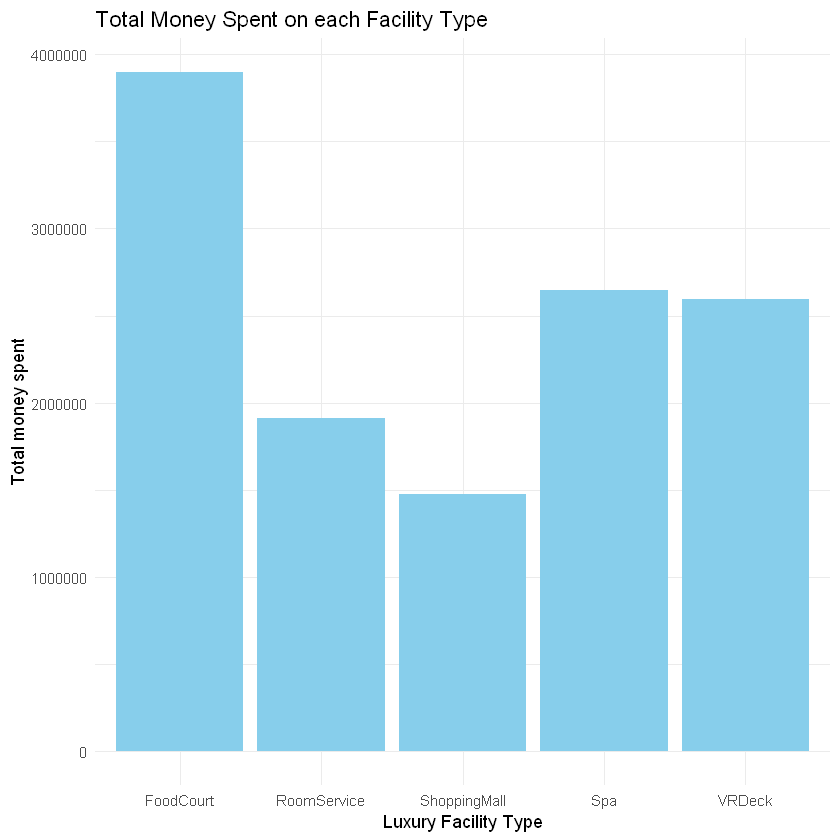

In [77]:
df %>% 
  summarise(RoomService = sum(RoomService, na.rm = T),
            FoodCourt = sum(FoodCourt, na.rm = T),
            ShoppingMall = sum(ShoppingMall, na.rm = T),
            Spa = sum(Spa, na.rm = T),
            VRDeck = sum(VRDeck, na.rm = T)) %>% 
  gather(FacilityType, Count) %>% 
  ggplot(aes(x = FacilityType, y = Count)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Money Spent on each Facility Type",
       x = "Luxury Facility Type",
       y = "Total money spent") +
  theme_minimal()

__Observation:__ The most lucrative facility type is Food Court. It brings the most profit to the Space Titanic,

In [93]:
separated_deck <- df %>%
  filter(Cabin != '') %>% 
  separate(Cabin, into = c("deck", "num", "side"), sep = "/")

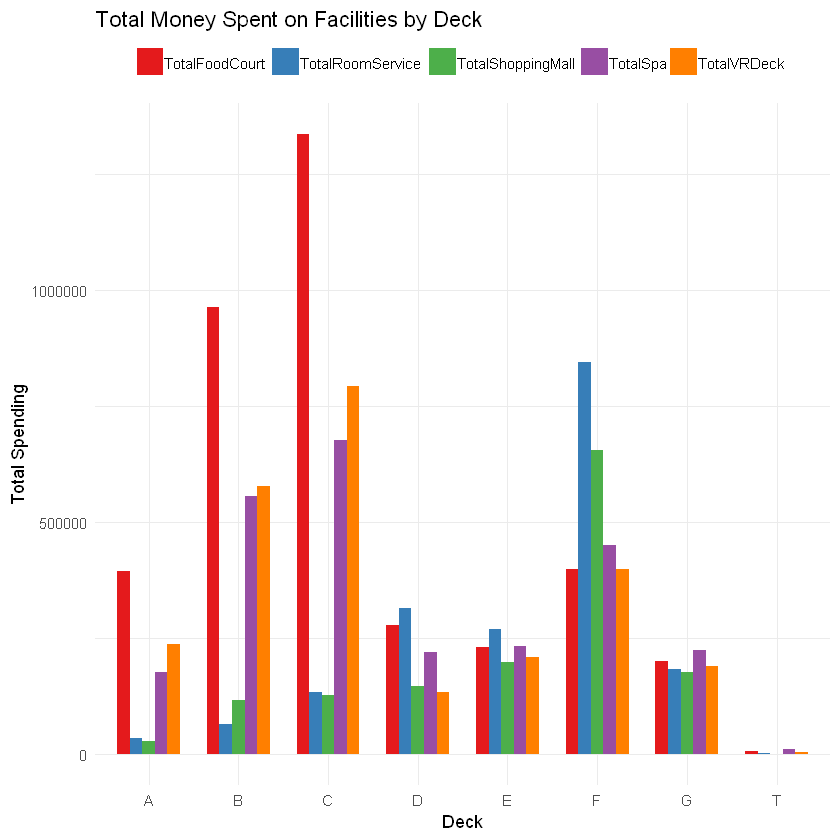

In [97]:
separated_deck %>%
  group_by(deck) %>%
  summarize(
    TotalRoomService = sum(RoomService, na.rm = T),
    TotalFoodCourt = sum(FoodCourt, na.rm = T),
    TotalShoppingMall = sum(ShoppingMall, na.rm = T),
    TotalSpa = sum(Spa, na.rm = T),
    TotalVRDeck = sum(VRDeck, na.rm = T)
  ) %>% 
  gather(key = "Facility", value = "TotalSpending", -deck) %>% 
  ggplot( aes(x = deck, y = TotalSpending, fill = Facility)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(title = "Total Money Spent on Facilities by Deck",
       x = "Deck",
       y = "Total Spending",
       fill = "Facility") +
  scale_fill_brewer(palette = "Set1") +
  theme_minimal() +
  theme(legend.position = "top", legend.title = element_blank(), axis.text.x = element_text(angle = 0))

__Observation:__ Here we can see the total money spent on the luxuries grouped by the decks. Some decks spend more than the others on each of the amenities. For example the most proportionaly is being spent on food court on deck A, B, C. Room service is more profitable in decks D, E, F.  

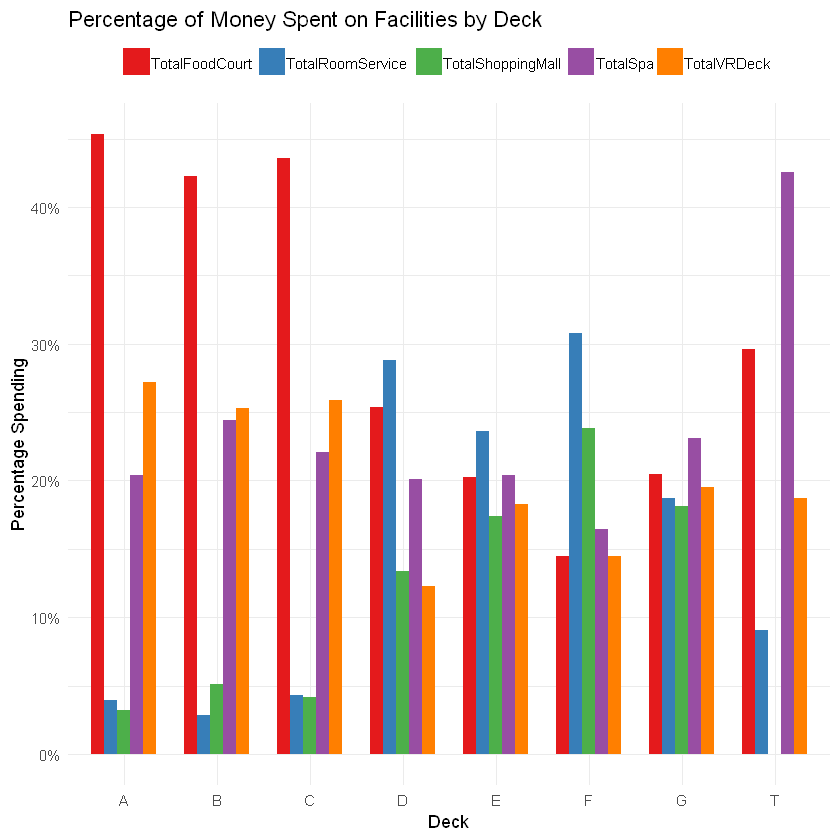

In [103]:
separated_deck %>%
  group_by(deck) %>%
  summarize(
    TotalRoomService = sum(RoomService, na.rm = T),
    TotalFoodCourt = sum(FoodCourt, na.rm = T),
    TotalShoppingMall = sum(ShoppingMall, na.rm = T),
    TotalSpa = sum(Spa, na.rm = T),
    TotalVRDeck = sum(VRDeck, na.rm = T)
  ) %>% 
  
  gather(key = "Facility", value = "TotalSpending", -deck) %>% 
  group_by(deck) %>%
  mutate(Percentage = (TotalSpending / sum(TotalSpending)) * 100) %>%
  ungroup() %>% 
  ggplot(aes(x = deck, y = Percentage, fill = Facility)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(title = "Percentage of Money Spent on Facilities by Deck",
       x = "Deck",
       y = "Percentage Spending",
       fill = "Facility") +
  scale_fill_brewer(palette = "Set1") +
  theme_minimal() +
  theme(legend.position = "top", legend.title = element_blank(), axis.text.x = element_text(angle = 0)) +
  scale_y_continuous(labels = scales::percent_format(scale = 1))

__Observation:__ This shows the procentage of 

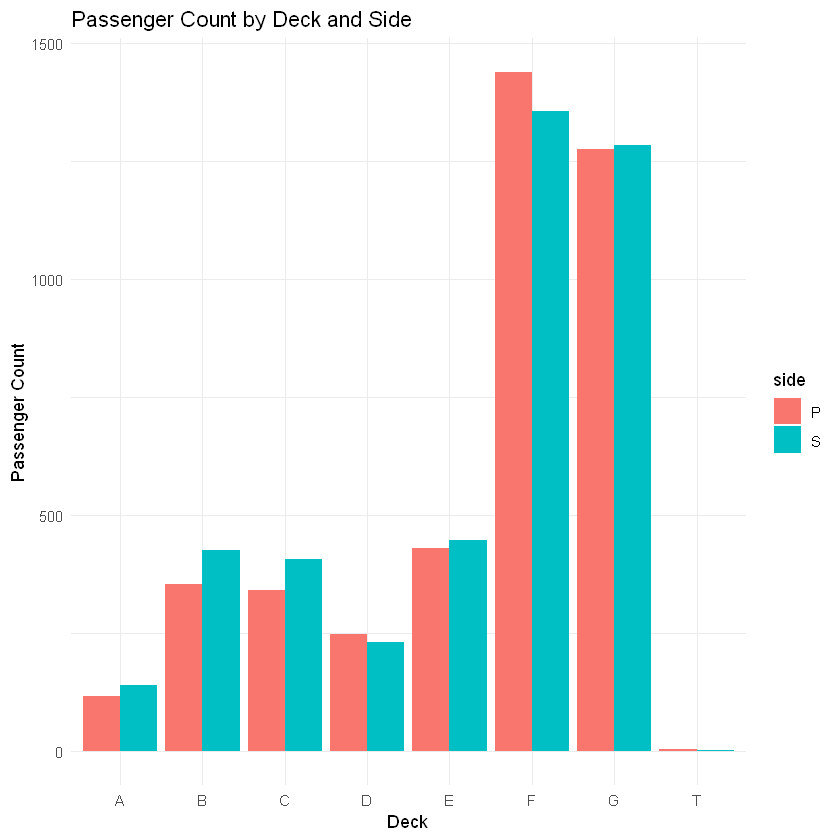

In [133]:
separated_deck %>%
  group_by(side, deck) %>%
  summarize(PassengerCount = n()) %>% 
  ggplot(aes(x = deck, y = PassengerCount, fill = side)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Passenger Count by Deck and Side", x = "Deck", y = "Passenger Count") +
  theme_minimal()

In [142]:
separated_deck %>%
  group_by(deck) %>%
  summarize(
    TotalAllFacilities = sum(RoomService + FoodCourt + ShoppingMall + Spa + VRDeck, na.rm = T)
  )

deck,TotalAllFacilities
A,827104
B,2169626
C,2811548
D,1010956
E,1039436
F,2496379
G,879464
T,19804


In [143]:
separated_deck %>%
  group_by(deck) %>%
  summarize(
    AverageSpending = mean(RoomService + FoodCourt + ShoppingMall + Spa + VRDeck, na.rm = T)
  ) 

deck,AverageSpending
A,3475.2269
B,3064.4435
C,4208.9042
D,2378.7200
E,1304.1857
F,1002.9646
G,386.7476
T,4951.0000


In [119]:
separated_deck

PassengerId,HomePlanet,CryoSleep,deck,num,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0001_01,Europa,False,B,0,P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
0002_01,Earth,False,F,0,S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
0003_01,Europa,False,A,0,S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
0003_02,Europa,False,A,0,S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
0004_01,Earth,False,F,1,S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True
0005_01,Earth,False,F,0,P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True
0006_01,Earth,False,F,2,S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True
0006_02,Earth,True,G,0,S,TRAPPIST-1e,28,False,0,0,0,0,NA,Candra Jacostaffey,True
0007_01,Earth,False,F,3,S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True
0008_01,Europa,True,B,1,P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True


In [146]:
sd_with_groups <- separated_deck %>%
  separate(PassengerId, into = c("Group", "Number"), sep = "_")

In [149]:
sd_with_groups %>% 
  mutate(SumOfCosts = RoomService + FoodCourt + ShoppingMall + Spa + VRDeck) %>%
  group_by(Group) %>% 
  summarize(sum_costs = sum(SumOfCosts, na.rm = T)) %>% 
  arrange(-sum_costs) %>% 
  head(10)

Group,sum_costs
4594,52668
6866,45970
4181,40121
2215,37520
6064,35987
4782,35430
8556,35319
3353,34551
6921,34284
1292,32670
